# Name: Michael Osei
***
### Question 0

Scored 85.00%


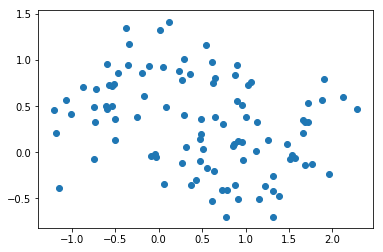

In [2]:
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

%matplotlib inline

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
plt.scatter(X[:,0],X[:,1], marker='o')
clf = LinearSVC(C=1)

clf.fit(X,y)
print("Scored {:2.2f}%".format(clf.score(X,y)*100))

### Question 1

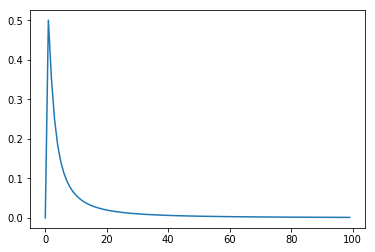

In [3]:
import numpy as np
from math import log2
ar = [(-1.0/i**2) * log2(1.0/i**2) for i in range(1,101, 1)]
plt.plot(ar)

### Question 2

In [4]:
from math import log

def entropy(m,n):
    if n == 0 or m == 0:
        return 0
    p = float(n)/(n+m)
    q = float(m)/(n+m)
    return -p*log(p,2) -q*log(q,2)
    
min = 8.0/20*entropy(6, 2)+9.0/20*entropy(0, 9.0)+3.0/20*entropy(0, 3.0)
print("Minimum entropy is: {:1.4f}".format(min))

Minimum entropy is: 0.3245


In [5]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
col0 = np.expand_dims(cancer.data[:,0], axis=1)
col1 = np.expand_dims(cancer.target, axis=1)

print(col0.shape, col1.shape)
arr = np.hstack((col0, col1))
arr = arr[arr[:,0].argsort()]

minim = (0, np.inf)
nr_points = arr.shape[0]
ones_top = 0
ones_bot = arr[:,1].sum()
zero_top = 0
zero_bot = nr_points - ones_bot
for i  in range(arr.shape[0]-1):
    if arr[i,1] == 1:
        ones_top += 1
        ones_bot -= 1
    else:
        zero_top += 1
        zero_bot -= 1    
    Esplit = (ones_top+zero_top)*entropy(ones_top, zero_top)+ (ones_bot+zero_bot)*entropy(ones_bot, zero_bot)
    
    if Esplit < minim[1]:
        minim = (i,Esplit)
print(minim[1])

(569, 1) (569, 1)


### Question 7

In [6]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import BaggingRegressor

boston = load_boston()

X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, 
                                                    train_size=0.8, test_size=0.2,random_state=0)
clf = LinearRegression()
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))

bag = BaggingRegressor(base_estimator=LinearRegression(), n_estimators=1000, 
                       max_features=0.5, random_state=0)
bag.fit(X_train, y_train)
print(bag.score(X_test, y_test))

0.589201151919
0.479883127904


The error for the ensemble classifier is lower 